In [97]:
from timeit import default_timer as timer
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
%matplotlib inline
start_time = timer()

In [10]:
data = pd.read_csv('applications data.csv')

In [11]:
data.shape

(1000000, 10)

In [12]:
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,20160101,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,20160101,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,20160101,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,20160101,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,20160101,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [13]:
data.dtypes

record          int64
date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [14]:
# Change date time from int to regulate datetime type
data['appyear'] = (data['date'] / 10000).astype('int') # extract year
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int') # extract month
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100 # extract date
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d') # chnage to datetime type
data = data.drop(columns = ['appyear','appmonth','appday'])

In [32]:
# Change dob time from int to regulate datetime type
data['appyear'] = (data['dob'] / 10000).astype('int') # extract year
data['appmonth'] = ((data['dob'] - data['appyear'] * 10000) / 100).astype('int') # extract month
data['appday'] = data['dob'] - data['appyear'] * 10000 - data['appmonth'] * 100 # extract date
data['dob'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d') # chnage to datetime type
data = data.drop(columns = ['appyear','appmonth','appday'])
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0


In [15]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob                     int64
homephone               int64
fraud_label             int64
dtype: object

In [33]:
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0


In [34]:
data.tail(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,1955-04-18,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,1915-06-24,6790134432,0
999997,999998,2016-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,1988-06-28,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,2012-03-02,5935293731,0
999999,1000000,2016-12-31,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,1982-08-26,5869926905,0


In [35]:
data.describe()

,record,ssn,zip5,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000
mean,500000.500000,5.083415e+08,50073.333143,5.368716e+09,0.014393
std,288675.278932,2.934864e+08,28915.921546,3.082161e+09,0.119104
min,1.000000,3.600000e+01,2.000000,5.937990e+05,0.000000
25%,250000.750000,2.542176e+08,24992.000000,2.677134e+09,0.000000
50%,500000.500000,5.088144e+08,50492.000000,5.399910e+09,0.000000
75%,750000.250000,7.630924e+08,74496.000000,8.109241e+09,0.000000
max,1000000.000000,1.000000e+09,99999.000000,1.000000e+10,1.000000


In [36]:
data.count()

record         1000000
date           1000000
ssn            1000000
firstname      1000000
lastname       1000000
address        1000000
zip5           1000000
dob            1000000
homephone      1000000
fraud_label    1000000
dtype: int64

In [37]:
data['fraud_label'].sum()

14393

In [38]:
print(len(data[data['fraud_label'] == 0]))

985607


In [39]:
print(len(data[data['fraud_label'] == 0]) + len(data[data['fraud_label'] != 0]))

1000000


In [23]:
goods = data[data['fraud_label'] == 0]
bads = data[data['fraud_label'] == 1]

In [40]:
numrecords = len(data)
print(numrecords)

1000000


In [41]:
print(len(goods))

985607


In [26]:
print(len(bads))

14393


In [27]:
len(data['record'].unique())

1000000

In [28]:
len(data['record']) * 100 / numrecords

100.0

In [29]:
len(data['date']) * 100 / numrecords

100.0

In [30]:
len(data['date'].unique())

365

In [42]:
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0


In [23]:
count_day = data.groupby('date').count()
count_day.head(10)

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
date,,,,,,,,,
2016-01-01,2840,2840,2840,2840,2840,2840,2840,2840,2840
2016-01-02,2719,2719,2719,2719,2719,2719,2719,2719,2719
2016-01-03,2764,2764,2764,2764,2764,2764,2764,2764,2764
2016-01-04,2757,2757,2757,2757,2757,2757,2757,2757,2757
2016-01-05,2732,2732,2732,2732,2732,2732,2732,2732,2732
2016-01-06,2682,2682,2682,2682,2682,2682,2682,2682,2682
2016-01-07,2782,2782,2782,2782,2782,2782,2782,2782,2782
2016-01-08,2809,2809,2809,2809,2809,2809,2809,2809,2809
2016-01-09,2779,2779,2779,2779,2779,2779,2779,2779,2779


## Numerical Summary Table

In [55]:
numeric=['date', 'dob']
numrecords=len(data)
num=[]
for i in numeric:
    items=[]
    items.append(i)
    pop= round(((numrecords - data[i].isnull().sum()) / numrecords) * 100,2)
    items.append(pop)
    Min= data[i].min()
    items.append(Min)
    Max= data[i].max ()
    items.append(Max)
    items.append('NA')
    items.append('NA')
    count=0
    for n in data[i]:
        if n ==0:
            count +=1
    zero= round((count / numrecords)*100, 2)
    items.append(zero)
    num.append(items)
num

[['date',
  100.0,
  Timestamp('2016-01-01 00:00:00'),
  Timestamp('2016-12-31 00:00:00'),
  'NA',
  'NA',
  0.0],
 ['dob',
  100.0,
  Timestamp('1900-01-01 00:00:00'),
  Timestamp('2016-10-31 00:00:00'),
  'NA',
  'NA',
  0.0]]

In [56]:
numeric_table = pd.DataFrame(num, columns=['Field Name','% Populated', 'Min', 'Max', 'Mean', 'Stdev', '% Zero'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
numeric_table

,Field Name,% Populated,Min,Max,Mean,Stdev,% Zero
0,date,100.00,2016-01-01,2016-12-31,NA,NA,0.00
1,dob,100.00,1900-01-01,2016-10-31,NA,NA,0.00


## Categorical Summary Table

In [53]:
categoric= ['record', 'ssn', 'firstname', 'lastname', 'address', 'zip5', 'homephone', 'fraud_label']
cat=[]
for i in categoric:
    items=[]
    items.append(i)
    pop=((numrecords - data[i].isnull().sum()) / numrecords) * 100
    items.append(pop)
    unique=len(data[i].unique())
    items.append(unique)
    common=data[i].value_counts().idxmax()
    items.append(common)
    cat.append(items)
cat

[['record', 100.0, 1000000, 2049],
 ['ssn', 100.0, 835819, 999999999],
 ['firstname', 100.0, 78136, 'EAMSTRMT'],
 ['lastname', 100.0, 177001, 'ERJSAXA'],
 ['address', 100.0, 828774, '123 MAIN ST'],
 ['zip5', 100.0, 26370, 68138],
 ['homephone', 100.0, 28244, 9999999999],
 ['fraud_label', 100.0, 2, 0]]

In [54]:
cat_table = pd.DataFrame(cat, columns=['Field Name','% Populated', '# Unique Values', 'Most Common Value'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cat_table

,Field Name,% Populated,# Unique Values,Most Common Value
0,record,100.00,1000000,2049
1,ssn,100.00,835819,999999999
2,firstname,100.00,78136,EAMSTRMT
3,lastname,100.00,177001,ERJSAXA
4,address,100.00,828774,123 MAIN ST
5,zip5,100.00,26370,68138
6,homephone,100.00,28244,9999999999
7,fraud_label,100.00,2,0


## Categorical

In [104]:
plt.rcParams.update({'figure.figsize':(10,6)})
plt.rcParams.update({'font.size':20})

### Record

Text(0.5, 1.0, 'The most frequently appear record')

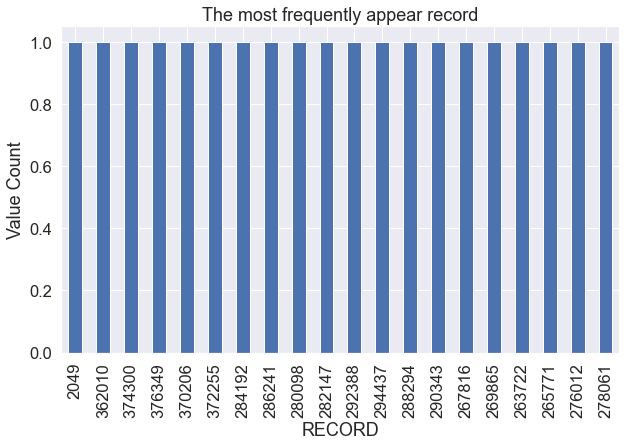

In [105]:
# Record
sns.set(font_scale=1.5)
data['record'].value_counts().head(20).plot(kind='bar')
plt.xlabel('RECORD')
plt.ylabel('Value Count')
plt.title('The most frequently appear record')

### SSN

In [62]:
len(data['ssn']) * 100 / numrecords

100.0

In [65]:
# find unique number in ssn column
len(data['ssn'].unique())

835819

In [66]:
#find value_counts for ssn
data['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
             ...  
705106256        1
457646422        1
419899735        1
500860762        1
803217404        1
Name: ssn, Length: 835819, dtype: int64

In [68]:
data[data['ssn'] == 999999999].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
10,11,2016-01-01,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,1940-01-26,3026547212,0
22,23,2016-01-01,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,1958-08-30,5568704443,0
64,65,2016-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,1907-06-26,9999999999,0
68,69,2016-01-01,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,2011-08-31,5490098836,0
74,75,2016-01-01,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,1976-06-25,2382673773,0
283,284,2016-01-01,999999999,MSJUZSMZJ,UXMTEZUT,356 UZSRE AVE,74187,1907-06-26,153492955,0
380,381,2016-01-01,999999999,XRJSMRRRT,RMRXAMX,9769 UAMZJ DR,52351,1907-06-26,3181686949,0
420,421,2016-01-01,999999999,XRXMTMZEZ,SZRXXJMX,5854 RXRXX PL,34957,1997-07-21,316681200,0
446,447,2016-01-01,999999999,RRZUZUSX,ESZRRRAA,8970 AXME RD,48333,1911-07-29,5350782211,0
468,469,2016-01-01,999999999,XETRJXESR,SSJXTUJM,6995 RMSST CT,48162,1970-04-18,2503172355,0


Text(0.5, 1.0, 'The most frequently appear social security number')

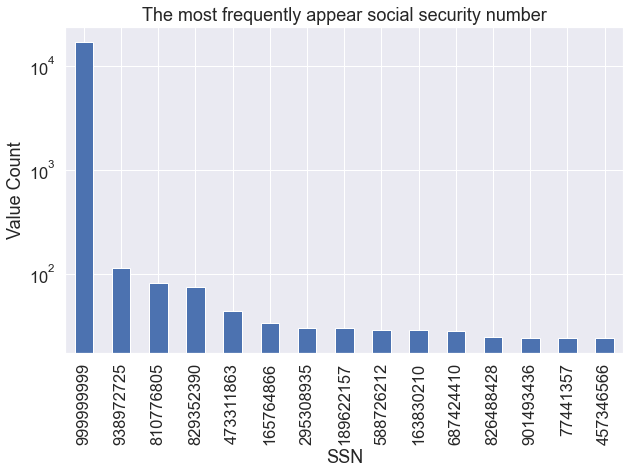

In [106]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('SSN')
plt.ylabel('Value Count')
plt.title('The most frequently appear social security number')

### firstname

In [77]:
len(data['firstname']) * 100 / numrecords

100.0

In [78]:
len(data['firstname'].unique())

78136

In [80]:
data['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
             ...  
UXRUAXERX        1
SRSTZZMJU        1
XTASXTSZ         1
UXTTAJMAX        1
EAZMEUAXE        1
Name: firstname, Length: 78136, dtype: int64

<ipython-input-107-f4aff80b8812>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'The most frequently appear first name')

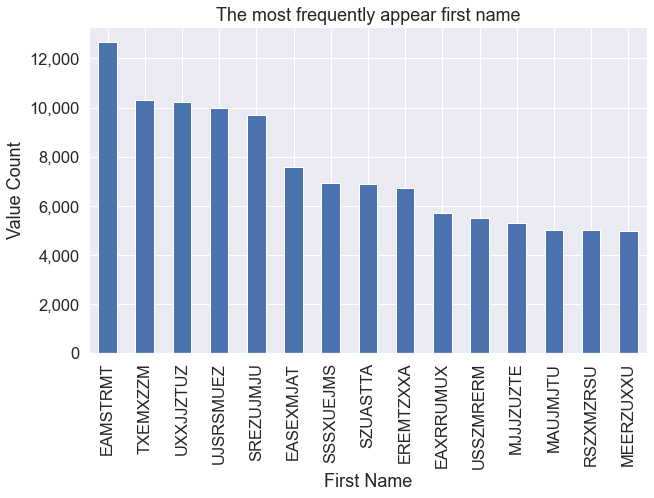

In [107]:
data['firstname'].value_counts().head(15).plot(kind='bar')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('First Name')
plt.ylabel('Value Count')
plt.title('The most frequently appear first name')

### lastname

In [87]:
len(data['lastname']) * 100 / numrecords

100.0

In [89]:
len(data['lastname'].unique())

177001

In [92]:
data['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
            ... 
UJSSMRSU       1
SATUSTZE       1
USMRRMRX       1
RSEAAZZR       1
UZREEURR       1
Name: lastname, Length: 177001, dtype: int64

<ipython-input-108-33c03cf73525>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'The most frequently appear last name')

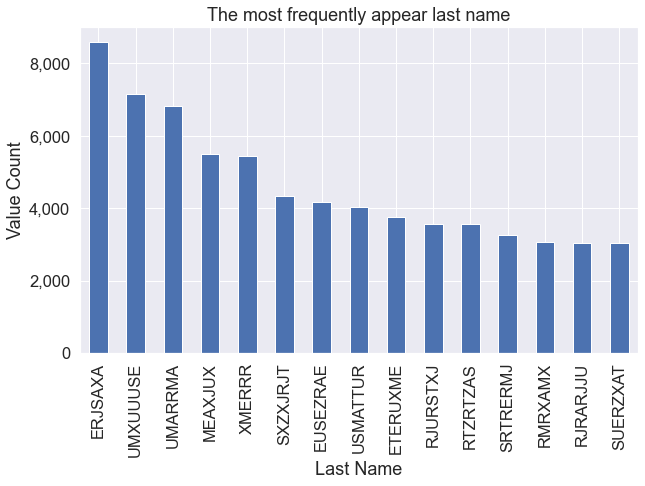

In [108]:
fg=data['lastname'].value_counts().head(15).plot(kind='bar')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('Last Name')
plt.ylabel('Value Count')
plt.title('The most frequently appear last name')

### address

In [109]:
len(data['address']) * 100 / numrecords

100.0

In [110]:
len(data['address'].unique())

828774

In [111]:
data['address'].value_counts()

123 MAIN ST      1079
1775 XJXE LN       97
7433 RAEZA ST      80
8911 MZSU DR       74
4907 RRAAU DR      73
                 ... 
3823 RRRER ST       1
4609 RSTRZ ST       1
6898 SZMJJ ST       1
4063 URJZA PL       1
7231 URET ST        1
Name: address, Length: 828774, dtype: int64

In [116]:
data[data['address'] == '123 MAIN ST'].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
1247,1248,2016-01-01,904524264,UJSRSMUEZ,EAXAXAXA,123 MAIN ST,68138,1924-10-31,8135264540,0
2191,2192,2016-01-01,345413970,XXSMUSEJT,SRRAXESJ,123 MAIN ST,68138,1930-05-26,94097353,0
2529,2530,2016-01-01,821839005,UXZUMTRTR,EARTMRJS,123 MAIN ST,68138,1962-11-01,7715547340,0
3434,3435,2016-01-02,24205988,SXTUZZXAS,UJJAJMM,123 MAIN ST,68138,1964-04-28,8788942828,0
3750,3751,2016-01-02,623763056,SEZESJMSR,UZJEUZMT,123 MAIN ST,68138,1973-11-07,974228226,0
4715,4716,2016-01-02,686787130,SXXSZJMM,ARRZTAA,123 MAIN ST,68138,1981-03-23,1839236819,1
5353,5354,2016-01-02,932938215,UXRJESTM,EETAEAR,123 MAIN ST,68138,1998-05-13,5441682419,0
7299,7300,2016-01-03,417080344,SJETUJAAZ,REMJTREU,123 MAIN ST,92821,1934-09-14,7507186577,0
8512,8513,2016-01-04,477797652,EAMSTRMT,UTXXZZET,123 MAIN ST,68138,1919-05-19,5922864904,0
8750,8751,2016-01-04,6367698,XUERJXSTU,EERMEXAE,123 MAIN ST,42035,1982-11-27,6442565981,0


<ipython-input-115-fad1bad2fdca>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'The most frequently appear address')

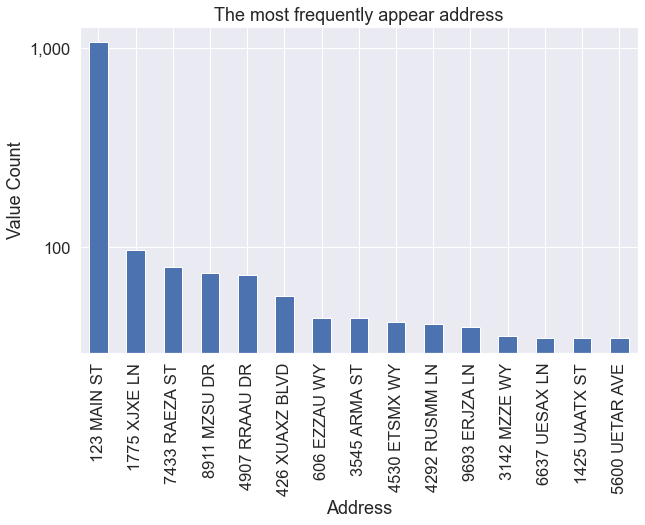

In [115]:
data['address'].value_counts().head(15).plot(kind='bar',logy=True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('Address')
plt.ylabel('Value Count')
plt.title('The most frequently appear address')

### zip5

In [117]:
len(data['zip5']) * 100 / numrecords

100.0

In [118]:
len(data['zip5'].unique())

26370

In [119]:
data['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
19358      1
54992      1
52110      1
33877      1
90739      1
Name: zip5, Length: 26370, dtype: int64

<ipython-input-125-6e49786f0fa5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'The most frequently appear zipcode')

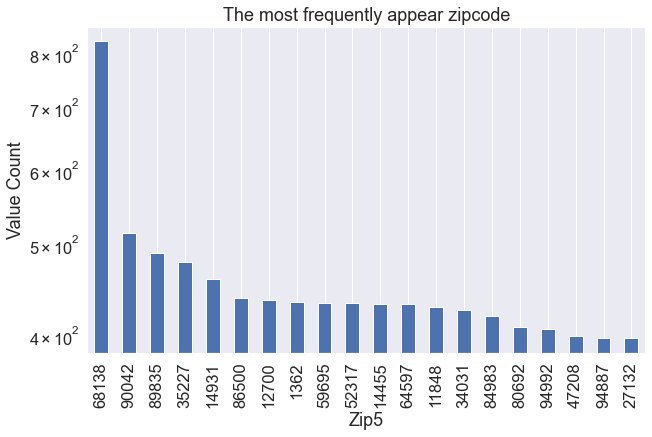

In [125]:
data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('Zip5')
plt.ylabel('Value Count')
plt.title('The most frequently appear zipcode')

### homephone

In [126]:
len(data['homephone']) * 100 / numrecords

100.0

In [127]:
len(data['homephone'].unique())

28244

In [128]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
1085332700        1
8331016607        1
8200004633        1
7517846394        1
2897617843        1
Name: homephone, Length: 28244, dtype: int64

<ipython-input-130-d79326f22da8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'The most frequently appear home phone number')

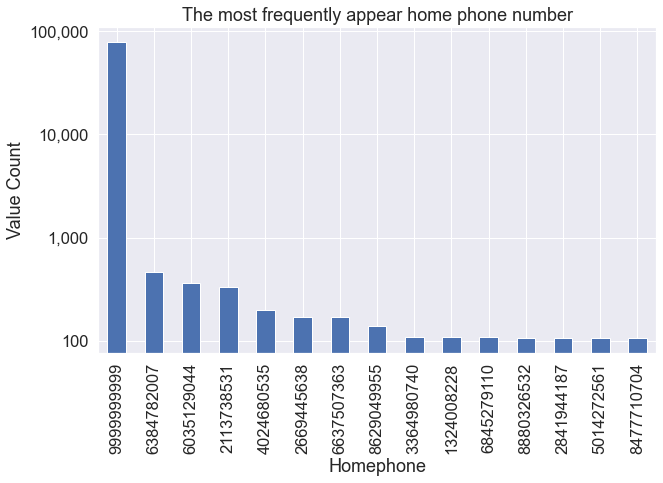

In [130]:
data['homephone'].value_counts().head(15).plot(kind='bar',logy=True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('Homephone')
plt.ylabel('Value Count')
plt.title('The most frequently appear home phone number')

### Fraud Label

In [132]:
len(data['fraud_label']) * 100 / numrecords

100.0

In [133]:
len(data['fraud_label'].unique())

2

In [135]:
data['fraud_label'].value_counts()

0    985607
1     14393
Name: fraud_label, dtype: int64

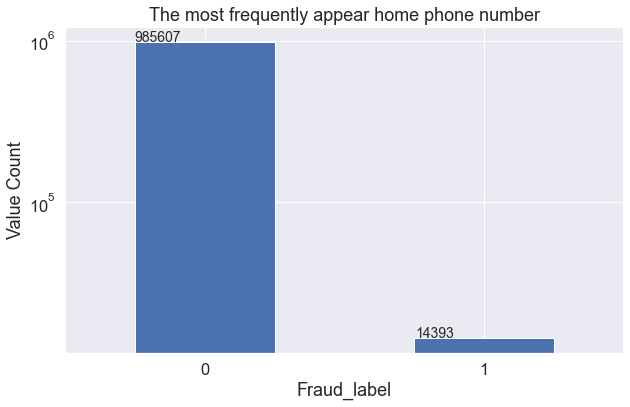

In [156]:
ax=data['fraud_label'].value_counts().head(15).plot(kind='bar',logy=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Fraud_label')
plt.ylabel('Value Count')
plt.xticks(rotation='horizontal')
plt.title('The most frequently appear home phone number')
plt.rcParams.update({'font.size': 14})

## Numerical

### date

<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

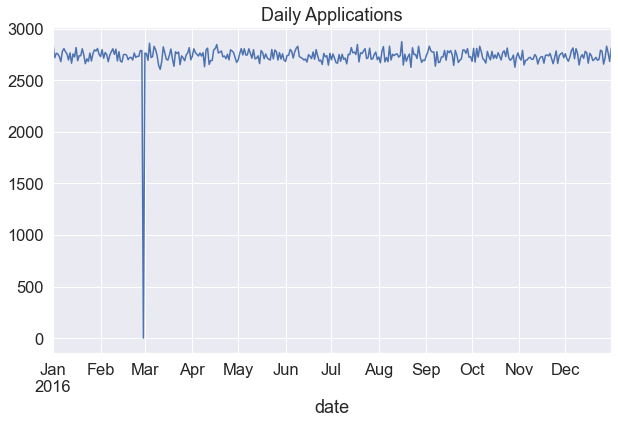

In [157]:
daily_count = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().apps
daily_count.plot(title = 'Daily Applications')

<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

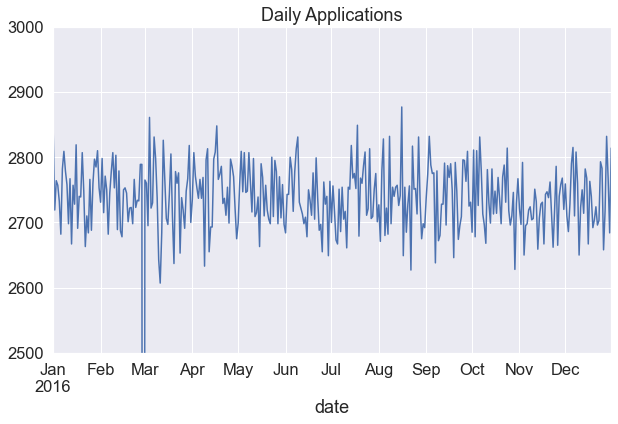

In [159]:
daily_count = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().apps
plt.ylim(2500,3000)
daily_count.plot(title = 'Daily Applications')

In [160]:
daily_count.head(70)

date
2016-01-01    2840
2016-01-02    2719
2016-01-03    2764
2016-01-04    2757
2016-01-05    2732
              ... 
2016-03-06    2730
2016-03-07    2831
2016-03-08    2798
2016-03-09    2738
2016-03-10    2643
Freq: D, Name: apps, Length: 70, dtype: int64

In [161]:
daily_count['2016-02-29'] = daily_count['2016-02-28']
daily_count.head(70)

date
2016-01-01    2840
2016-01-02    2719
2016-01-03    2764
2016-01-04    2757
2016-01-05    2732
              ... 
2016-03-06    2730
2016-03-07    2831
2016-03-08    2798
2016-03-09    2738
2016-03-10    2643
Freq: D, Name: apps, Length: 70, dtype: int64

<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

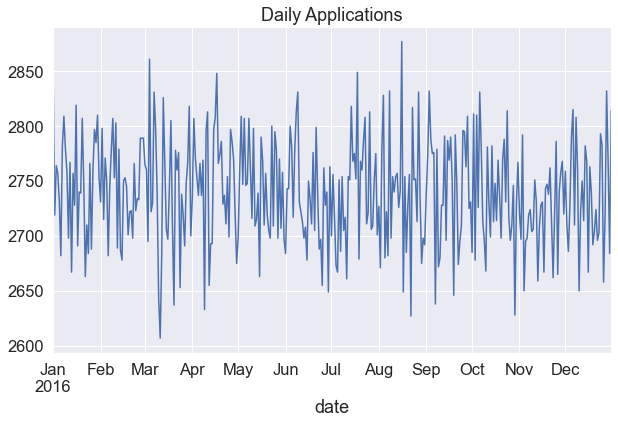

In [162]:
daily_count.plot(title = 'Daily Applications')

<AxesSubplot:title={'center':'Daily Applicationss'}, xlabel='date'>

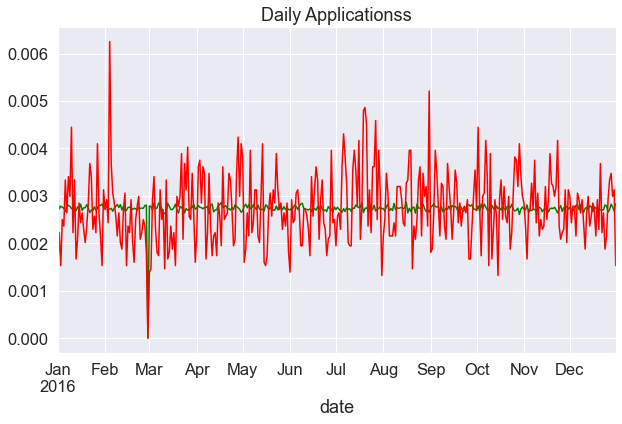

In [163]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<AxesSubplot:title={'center':'Weekly Applications'}, xlabel='date'>

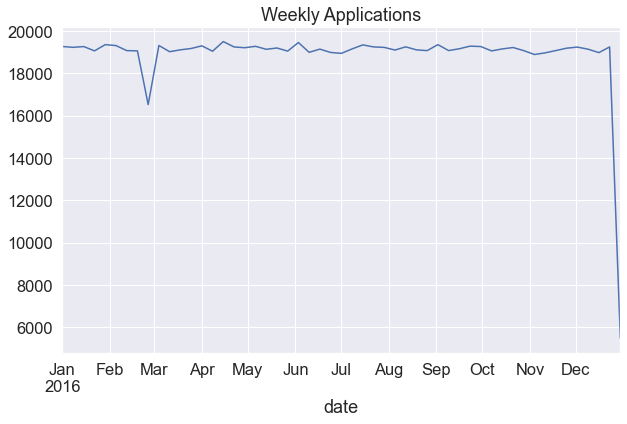

In [164]:
weekly_applications = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 7))\
    .count().apps
weekly_applications.plot(title = 'Weekly Applications')

In [165]:
weekly_applications.head(60)

date
2016-01-01    19276
2016-01-08    19235
2016-01-15    19272
2016-01-22    19068
2016-01-29    19363
2016-02-05    19318
2016-02-12    19081
2016-02-19    19067
2016-02-26    16531
2016-03-04    19323
2016-03-11    19029
2016-03-18    19118
2016-03-25    19181
2016-04-01    19306
2016-04-08    19052
2016-04-15    19508
2016-04-22    19254
2016-04-29    19217
2016-05-06    19284
2016-05-13    19143
2016-05-20    19204
2016-05-27    19057
2016-06-03    19463
2016-06-10    19000
2016-06-17    19151
2016-06-24    18994
2016-07-01    18950
2016-07-08    19160
2016-07-15    19351
2016-07-22    19255
2016-07-29    19233
2016-08-05    19108
2016-08-12    19258
2016-08-19    19116
2016-08-26    19080
2016-09-02    19362
2016-09-09    19082
2016-09-16    19169
2016-09-23    19292
2016-09-30    19272
2016-10-07    19067
2016-10-14    19160
2016-10-21    19227
2016-10-28    19080
2016-11-04    18896
2016-11-11    18975
2016-11-18    19084
2016-11-25    19196
2016-12-02    19247
2016-12-09    1

<AxesSubplot:title={'center':'Weekly Applications'}, xlabel='date'>

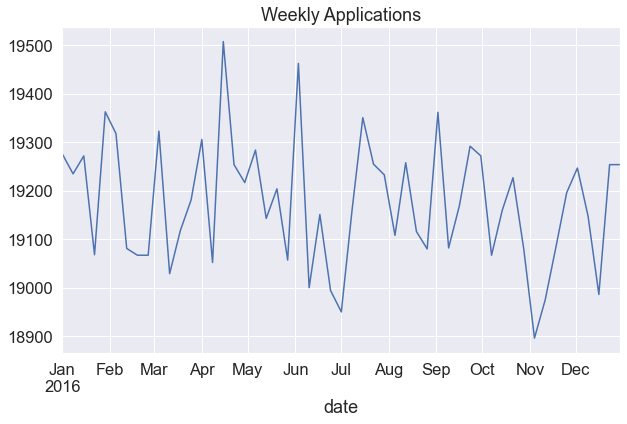

In [166]:
weekly_applications['2016-02-26'] = weekly_applications['2016-02-19']
weekly_applications['2016-12-30'] = weekly_applications['2016-12-23']
weekly_applications.plot(title = 'Weekly Applications')

Text(0.5, 0, 'Date')

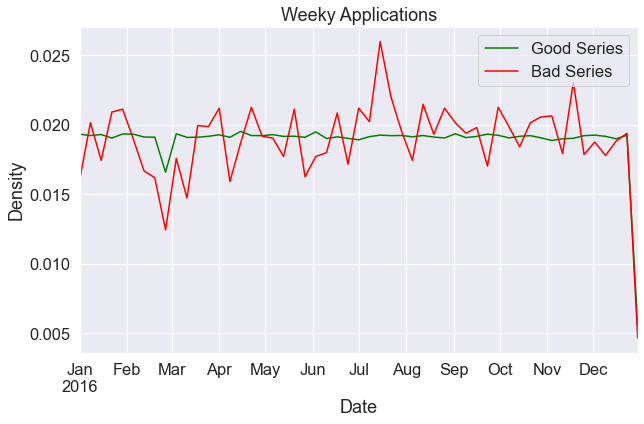

In [188]:
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 7)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 7)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')
plt.legend(labels=['Good Series','Bad Series'],
           loc='upper right') 
plt.ylabel('Density')
plt.xlabel('Date')

<AxesSubplot:title={'center':'Monthly Applications'}, xlabel='date'>

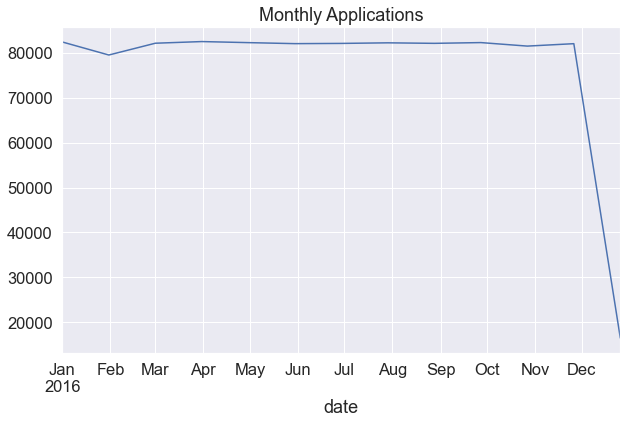

In [180]:
weekly_applications = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 30))\
    .count().apps
weekly_applications.plot(title = 'Monthly Applications')

In [181]:

weekly_applications['2016-12-26 ']=weekly_applications.mean()


In [182]:
weekly_applications

date
2016-01-01   82446.00
2016-01-31   79545.00
2016-03-01   82171.00
2016-03-31   82540.00
2016-04-30   82303.00
2016-05-30   82078.00
2016-06-29   82128.00
2016-07-29   82259.00
2016-08-28   82144.00
2016-09-27   82313.00
2016-10-27   81531.00
2016-11-26   82069.00
2016-12-26   76923.08
Freq: 30D, Name: apps, dtype: float64

<AxesSubplot:title={'center':'Monthly Applications'}, xlabel='date'>

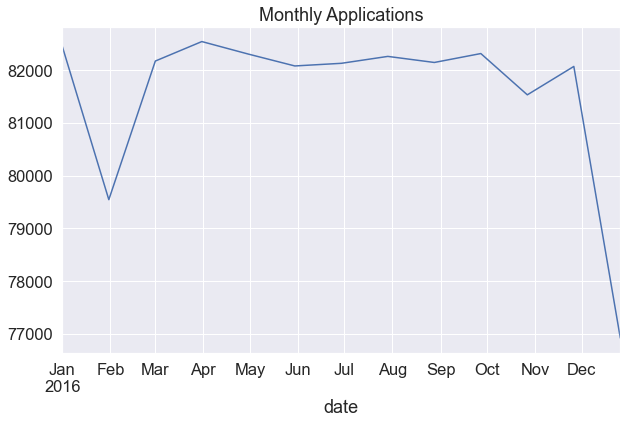

In [183]:
weekly_applications.plot(title = 'Monthly Applications')

### dob

In [56]:
len(data['dob']) * 100 / numrecords

100.0

In [57]:
len(data['dob'].unique())

42673

In [58]:
data['dob'].value_counts()

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
             ...  
19330705         5
19750509         5
19450523         5
19860313         5
19960904         5
Name: dob, Length: 42673, dtype: int64

<AxesSubplot:>

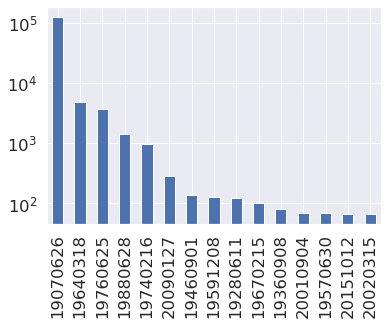

In [59]:
data['dob'].value_counts().head(15).plot(kind='bar',logy=True)

In [201]:
data['Year'] = pd.DatetimeIndex(data['dob']).year

/Users/freda/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Year of Birth for applicants')

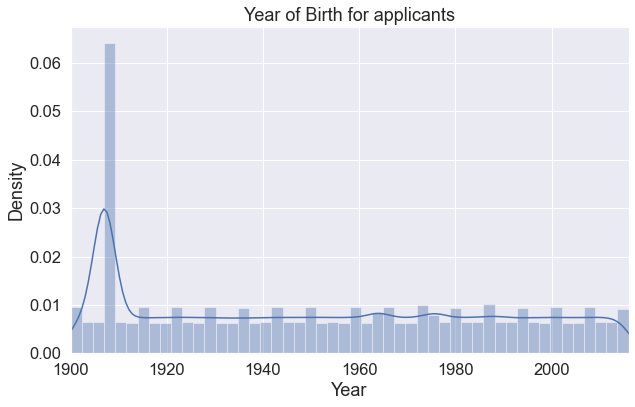

In [212]:
xhigh = data['Year'].max()
xlow=data['Year'].min()
plt.xlim(xlow,xhigh)
sns.distplot(data['Year'], bins=50, kde=True)
plt.title('Year of Birth for applicants')

In [65]:
print(f'Duration: {(timer() - start_time) / 60: 0.2f} minutes, or{(timer() - start_time): 0.0f} seconds')

Duration:  0.20 minutes, or 12 seconds
